# **ANALISIS DE MERCADO INMOBILIARIO**

---
# <br />
# 1. Pensando como una Data Scientist.
# <br />
---






Para realizar este análisis sería importante conocer diferentes aspectos que influyan de una u otra forma y a diferentes grados dentro del movimiento del mercado y el establecimiento de precios, podrímos destacar: 


*   El tipo de inmueble, si es casa, apartamento, local, etc.
*   El área que ocupa.
*   La ubicación, el barrio en el que se encuentra, si está en una zona residencial o en una zona industrial, la cercanía a escuelas, hospitales, centros comerciales, cercanía a zonas verdes y zonas recreativas, si está en un conjunto los beneficios que trae consigo (bbq, canchas, piscina, etc).
*   La distribución del inmueble, número de pisos, número de habitaciones y baños, si tiene balcones, número de entradas.
*   El diseño en general, iluminación y acabados.
*   La oferta y demanda que se de en el momento.
*   Elemento de lista



Otro aspecto que podría llegar a influir pero de forma esporadica es la necesidad de vender un inmueble en corto tiempo, esto podría llegar a bajar los precios de forma considerable.





---
# <br />
# 2. Análisis exploratorio de datos.
# <br />
---
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

*2.1. Cargamos el dataset y determinamos el tamaño de este:*

In [3]:
df = pd.read_csv ("properati.csv")
print(df.shape)
df.head(5)

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2.2. Obtenemos el nombre de las columnas:

In [4]:
print(df.columns)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


Podemos encontrar información acerca de las fechas de alta y de baja del aviso (**start_date**, **end_date**), la ubicación referenciándola con latitud, longitud, país, provincia y ciudad (**lat**, **lon**, **l1**, **l2** y **l3**, respectivamente), número de habitaciones, dormitorios, baños, superficie total, superficie cubierta, precio, moneda, título y descripción del anuncio, tipo de propiedad y la operación a realizar (alquiler o venta).

Por columna determinamos el número de valores nulos:

In [5]:
(df.isnull (). sum ())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

*2.3. Se determinan cuantos tipos de propiedad se tienen en cuenta y cuantas hay de cada una:*

In [6]:
df.groupby('property_type').size()

property_type
Casa                21521
Casa de campo         322
Cochera               259
Departamento       107326
Depósito              265
Local comercial       325
Lote                 1312
Oficina               658
Otro                  374
PH                  14298
dtype: int64

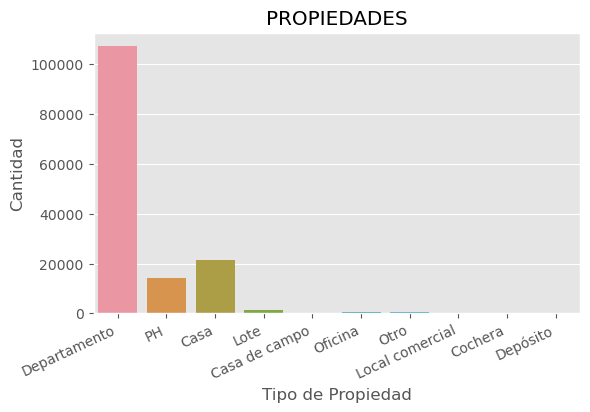

In [7]:
with plt.style.context('ggplot'):
  fig=plt.figure(dpi=100)
  g=sns.countplot(data = df, x = 'property_type')
  g.set_xticklabels(g.get_xticklabels(), rotation=25, ha="right")
  plt.tight_layout()
  plt.xlabel('Tipo de Propiedad')
  plt.ylabel('Cantidad')
  plt.title('PROPIEDADES')

  plt.show()

*2.4. Visualizamos las regiones de donde son las publicaciones; en su mayoria son de la Capital Federal y de la ciudad de Palermo.*

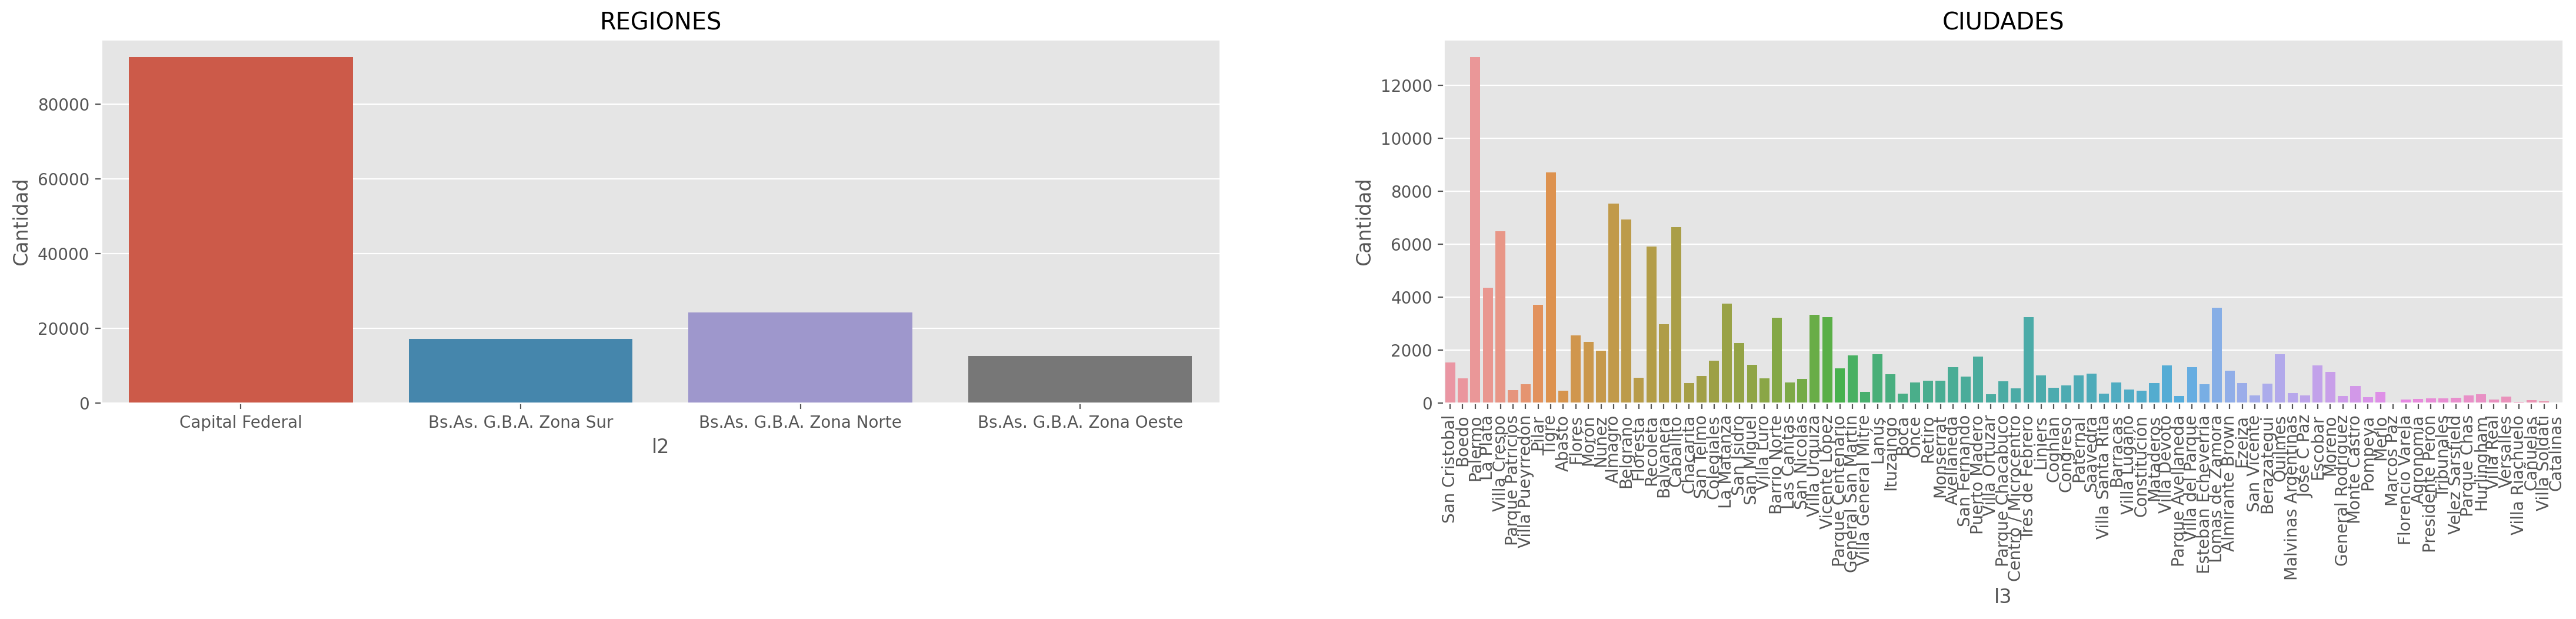

In [8]:
with plt.style.context('ggplot'):
  fig=plt.figure(figsize=(27*1,9), dpi=200)
  fig.tight_layout()

  plt.subplot(2,2,1)
  plt.xticks(rotation=0)
  sns.countplot(data = df, x = 'l2')
  plt.xlabel('l2')
  plt.ylabel('Cantidad')
  plt.title('REGIONES')

  plt.subplot(2,2,2)
  plt.xticks(rotation=90)
  sns.countplot(data = df, x = 'l3')
  plt.xlabel('l3')
  plt.ylabel('Cantidad')
  plt.title('CIUDADES')


*2.5 Filtramos nuestro Dataset por tipo de propiedad y la región con más propiedades publicadas:*

In [9]:
data = df[((df['property_type']=='Departamento')|(df['property_type']=='PH')|(df['property_type']=='Casa'))&(df['l2']=='Capital Federal')]
data.shape

(91485, 19)

*2.6. Distribuciones y relaciones de a pares.*

Antes de realizar este análisis es importante eliminar los valores nulos que en esta ocasión no nos serán útiles.

In [10]:
data = data.dropna () 
data.count ()


start_date         76961
end_date           76961
created_on         76961
lat                76961
lon                76961
l1                 76961
l2                 76961
l3                 76961
rooms              76961
bedrooms           76961
bathrooms          76961
surface_total      76961
surface_covered    76961
price              76961
currency           76961
title              76961
description        76961
property_type      76961
operation_type     76961
dtype: int64

In [11]:
(df.isnull (). sum ())


start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [12]:
df.shape

(146660, 19)

Se confirma que fueron eliminados todos los datos nulos.

 
*   Análisis estadístico




In [13]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,76961.000000,76961.000000,76961.000000,76961.000000,76961.000000,76961.000000,76961.000000,7.696100e+04
mean,-34.598323,-58.434845,3.005223,1.998857,1.538610,113.103000,95.086940,2.587050e+05
std,0.023399,0.035745,1.306747,1.051604,0.838084,1015.102403,804.084792,3.248616e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.612203,-58.457343,2.000000,1.000000,1.000000,49.000000,44.000000,1.240000e+05
50%,-34.598713,-58.432771,3.000000,2.000000,1.000000,71.000000,63.000000,1.780000e+05
75%,-34.584093,-58.409599,4.000000,3.000000,2.000000,110.000000,95.000000,2.780000e+05
max,-34.535909,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Con esta primera aproximación a los valores de las variables creo que es importante su relación con el tipo de propiedad porque los valores extremos como por ejemplo una superficie cubierta de 1m2 o 14 baños se entendería mejor teniendo claro el tipo de propiedad al que pertenecen. También se puede notar una marcada diferencia entre el cuartil 75% y los valores máximos lo que nos da idea de valores atípicos.


*   Determinación del rango razonable para la visualización.



Se eliminan los datos atípicos para obtener una mejor visualización.

In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lat                     0.028110
lon                     0.047743
rooms                   2.000000
bedrooms                2.000000
bathrooms               1.000000
surface_total          61.000000
surface_covered        51.000000
price              154000.000000
dtype: float64


In [15]:
data= data[~((data < (Q1-1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

<ipython-input-15-248eb5144a2b>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data= data[~((data < (Q1-1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-15-248eb5144a2b>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data= data[~((data < (Q1-1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


(66113, 19)

Se visualizan los datos luego de aplicar los filtros.

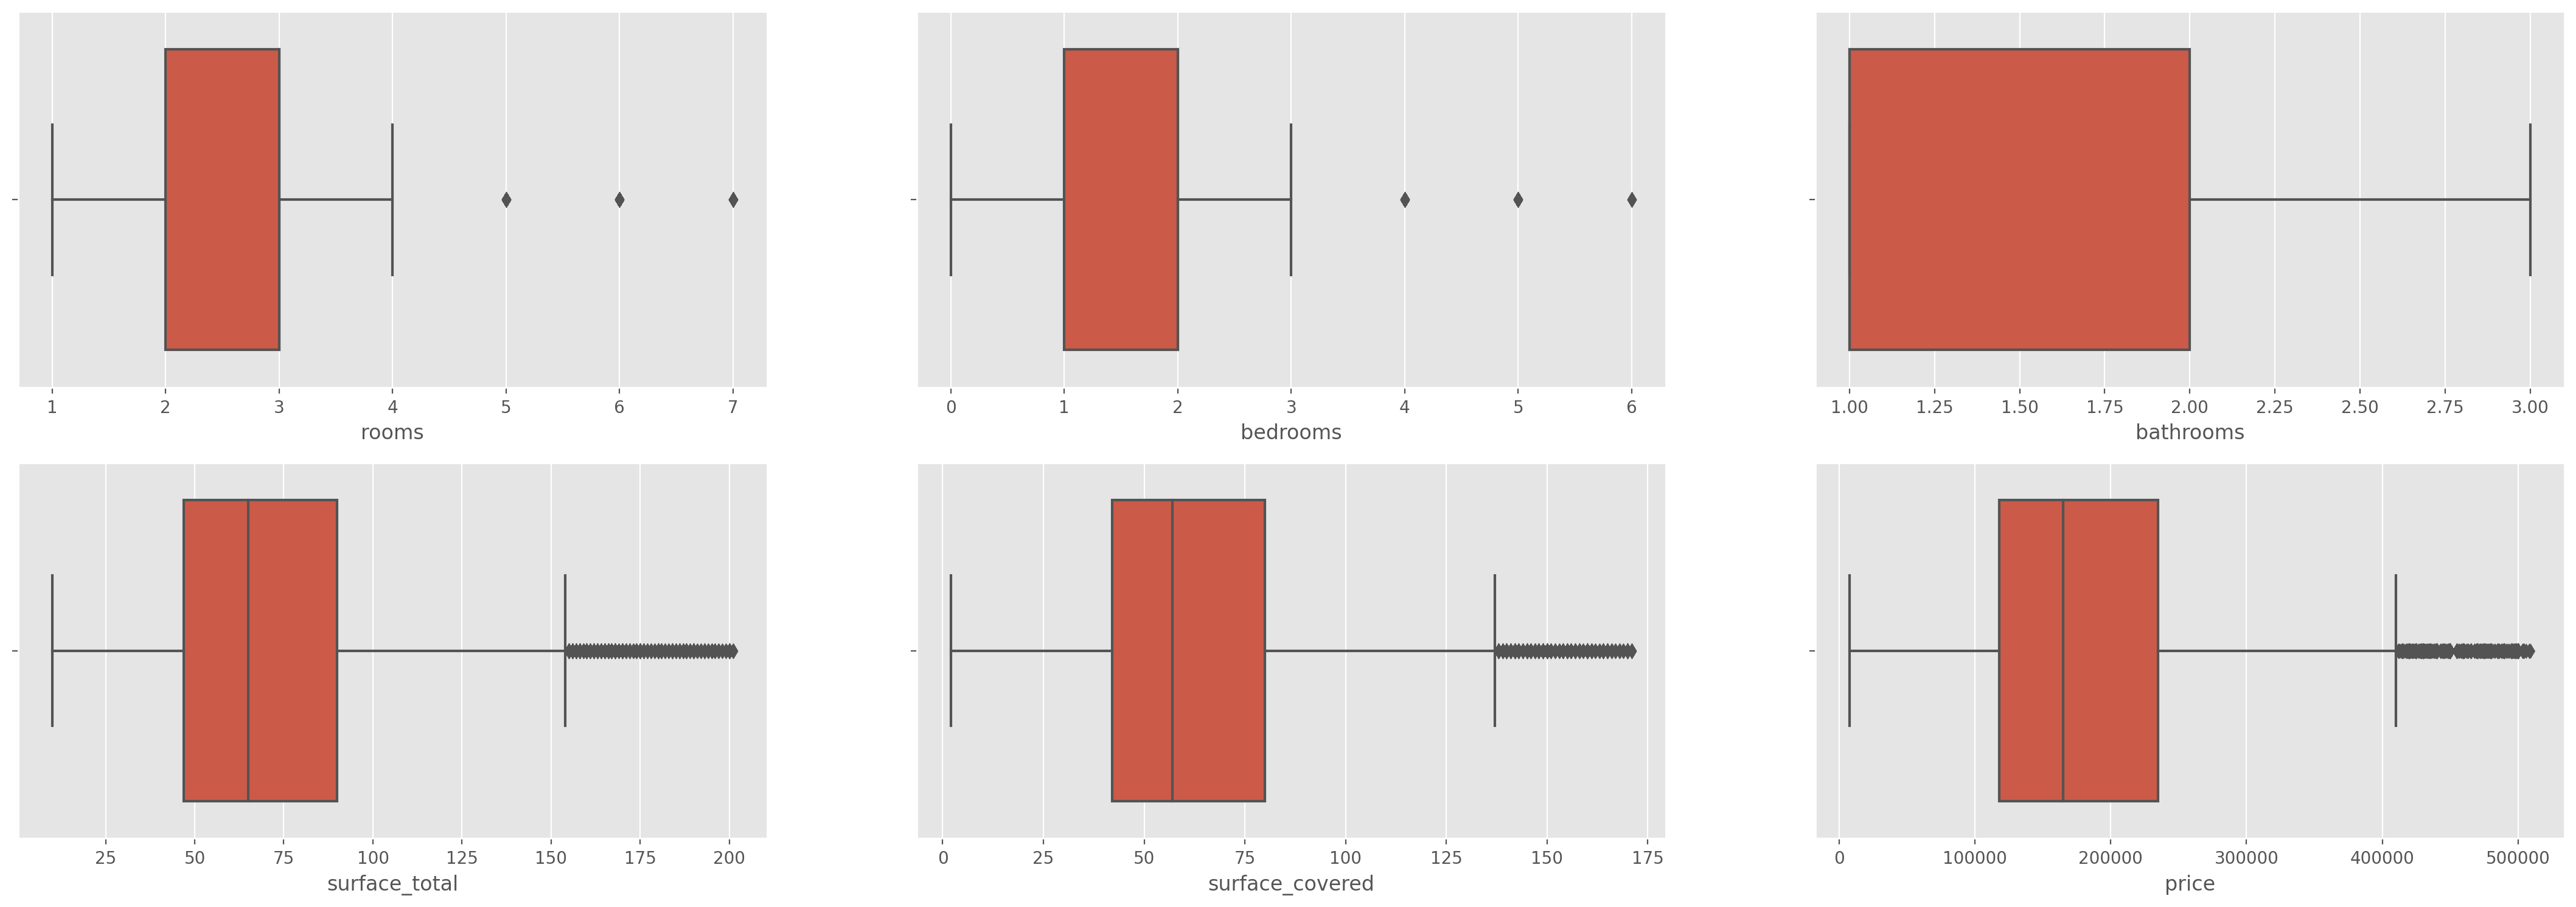

In [16]:
with plt.style.context('ggplot'):
  fig=plt.figure(figsize=(27*1,9), dpi=200)
  fig.tight_layout()

  plt.subplot(2,3,1)
  sns.boxplot(x=data['rooms'])

  plt.subplot(2,3,2)
  sns.boxplot(x=data['bedrooms'])

  plt.subplot(2,3,3)
  sns.boxplot(x=data['bathrooms'])

  plt.subplot(2,3,4)
  sns.boxplot(x=data['surface_total'])

  plt.subplot(2,3,5)
  sns.boxplot(x=data['surface_covered'])

  plt.subplot(2,3,6)
  sns.boxplot(x=data['price'])

  
*   Es importante verificar que en todas las propiedades la superficie cubierta no supere la superficie total.




In [17]:
data=data[data['surface_total']>data['surface_covered']]
data.shape

(45615, 19)

Del filtro de valores atípicos obtuvimos 77149 instancias, filtrando para asegurarnos que la superficie total sea mayor que la superficie cubierta las instancias disminuyeron en 23691.


*   Ya en este punto se puede realizar el pairplot para observar de una forma general la relación entre variables.



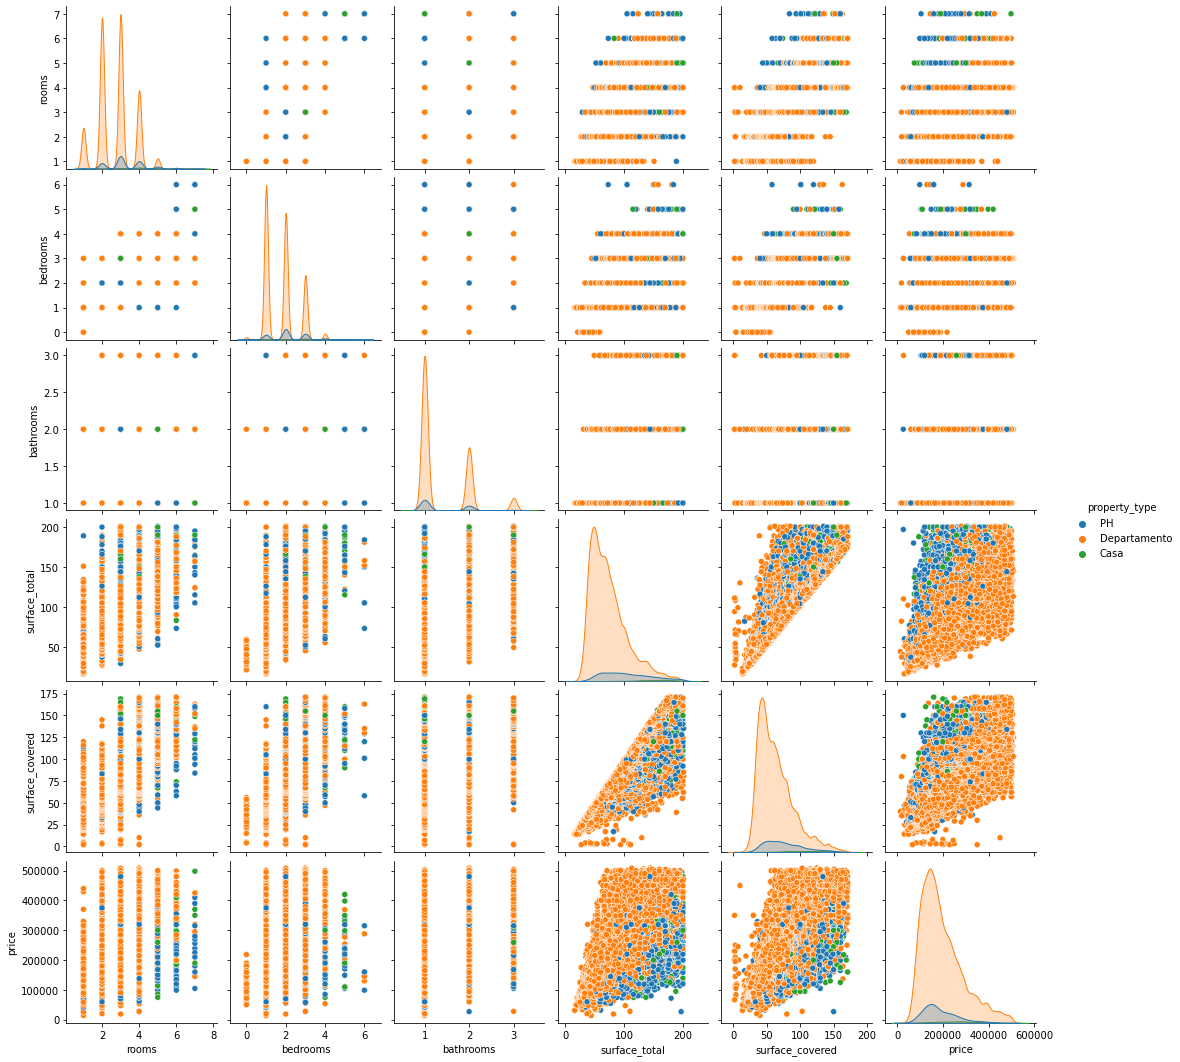

In [18]:
sns.pairplot(data, vars=["rooms", "bedrooms", "bathrooms","surface_total", "surface_covered","price"], hue='property_type')

En general solo se alcanza a ver la distribución de los tipos de propiedades más comunes, se alcanza a notar una agrupación aunque no de forma muy clara al relacionar las superficies cubierta y total y el precio entre sí.

2.7. Procedemos a realizar la correlación entre las variables habitaciones, dormitorios, baños, superficie total, superficie cubierta y precio.

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.936787,0.518605,0.737734,0.799204,0.581544
bedrooms,0.936787,1.000000,0.523825,0.719906,0.788945,0.562172
bathrooms,0.518605,0.523825,1.000000,0.554272,0.617771,0.603186
surface_total,0.737734,0.719906,0.554272,1.000000,0.907461,0.704327
surface_covered,0.799204,0.788945,0.617771,0.907461,1.000000,0.751749
price,0.581544,0.562172,0.603186,0.704327,0.751749,1.000000


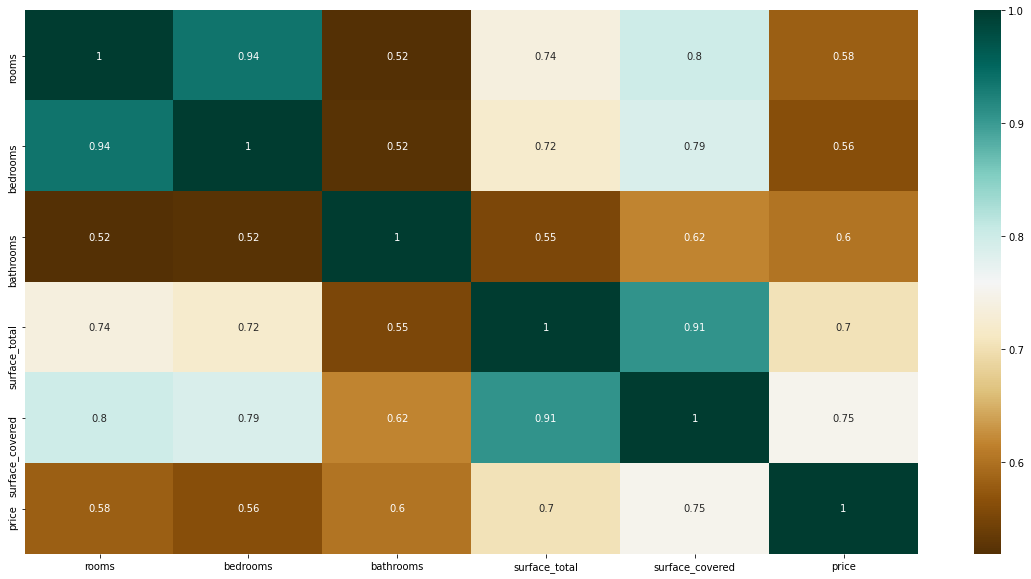

In [19]:
data=data[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
plt.figure(figsize=(20,10))
c=data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

Se encuentra que la variable que más se relaciona con el precio es la superficie cubierta con una correlación del 75%. Las variables que guardan mayor correlación entre sí son habitaciones y dormitorios, pero en general todas se relacionan entre ellas puesto que ninguna correlación nos da menor al 52%. 

---
# <br />
# 2.1. Desafío.
# <br />
---

Este análisis es con el fin de tener una idea de los valores promedio por metro cuadrado de viviendas que cuentan con según el criterio a aplicar con este dataset (80% superficie total >= Superficie cubierta) amplios espacios al aire libre, se tendría que tener datos de otros espacios al aire libre que se pueden adecuar dentro de las viviendas como las terrazas y demás para realizar un análisis más completo, adicional sería interesante poder ver la variación de estos valores con respecto al tiempo y si se vio alguna valorización de estas propiedades desde la pandemia.

In [20]:
df = pd.read_csv ("properati.csv")
print(df.shape)


(146660, 19)


Realizamos un filtrado de dataframe eliminando datos nulos y en los que la superficie cubierta supere la superficie total.

In [21]:
df = df.dropna () 

In [22]:
df=df[df['surface_total']>df['surface_covered']]

Trabajamos con las propiedades más comunes que hacen referencia a vivienda, filtramos por las que para este caso tendrían buen espacio al aire libre según el criterio elegido y se saca el precio por metro cuadrado y el promedio de las que superan el 80% construido y las que no (propiedades que cuentan con buen espacio al aire libre).

In [23]:
percent= (df['surface_total'])*0.8

In [24]:
data1= df[((df['property_type']=='Departamento')|(df['property_type']=='PH')|(df['property_type']=='Casa'))&(df['surface_covered']<=percent)]
data1['metro_cuadrado1']=(data1['price'])/(data1['surface_total'])
mean_df = data1['metro_cuadrado1'].mean()

<ipython-input-24-549515217a33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['metro_cuadrado1']=(data1['price'])/(data1['surface_total'])


In [25]:
data2= df[((df['property_type']=='Departamento')|(df['property_type']=='PH')|(df['property_type']=='Casa'))&(df['surface_covered']>=percent)]
data2['metro_cuadrado2']=(data2['price'])/(data2['surface_total'])
mean_df2 = data2['metro_cuadrado2'].mean()

<ipython-input-25-cdf74e99b930>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['metro_cuadrado2']=(data2['price'])/(data2['surface_total'])


In [26]:
print(mean_df,mean_df2)

1434.61830696818 2704.607954676383


Para este dataset el valor por metro cuadrado de las casas que tienen mayor parte construida tienen un costo más elevado.

---
# <br />
# 3. Machine Learning.
# <br />
---

In [2]:
df = pd.read_csv ("properati.csv")
print(df.shape)


(146660, 19)


**Filtrado.**

Para empezar a realizar el modelo de machine learning vamos a realizar una serie de filtros que nos permitan trabajar con datos de calidad:

1. Propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.

In [3]:
data = df[((df['property_type']=='Departamento')|(df['property_type']=='PH')|(df['property_type']=='Casa'))&(df['l2']=='Capital Federal')]
data.shape

(91485, 19)

2. Propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.

In [4]:
data = data[(data['surface_total']>=15) & (data['surface_total']<=1000)]
data.shape

(82405, 19)

3. Propiedades cuya precio es menor 4000000 dólares.

In [5]:
data = data[(data['price']<=4000000)]
data.shape

(82373, 19)

4. Columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`

In [6]:
data=data[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
data.shape

(82373, 6)

Como métrica para evaluar en este caso siendo un modelo de regresión utilizaremos la raíz del error cuadrado promedio RMSE. Dentro de los métodos más utilizados para evaluar las variables continuas encontramos MAE, MSE Y RMSE, representan la desviación estándar de la muestra de las diferencias entre los valores predichos y los valores observados. En general estos valores sirven para ser comparados entre modelos pero por si solos no dan una idea de que tan bueno es un modelo. El RMSE es la raíz de los valores usados en MSE que a su vez es el cuadrado de los valores tomados para el MAE por lo que en RMSE y MSE los errores más altos son castigados mayormente. Aun así el RMSE nos da un resultado con las mismas unidades que los datos utilizados lo que facilita su análisis y uso para otras operaciones de ser requerido.

5. Descartar aquellas instacias con valores faltantes.

In [7]:
data = data.dropna() 
data.count ()

rooms              81019
bedrooms           81019
bathrooms          81019
surface_total      81019
surface_covered    81019
price              81019
dtype: int64

In [8]:
data.shape

(81019, 6)

*   *Determinamos variable predictora y variable a predecir.*

In [9]:
x = data.drop("price", axis=1)
y = data.price

* *Realizamos el train/test split de los datos.*




In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

* *Generamos un modelo de regresión lineal el cual será nuestro modelo benchmark*

**Regresión Lineal:Benchmark.**

Creamos y entrenamos nuestro modelo de regresión lineal.

In [12]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

Predecimos etiquetas para train y test.

In [13]:
y_train_pred =linear_model.predict(x_train)
y_test_pred = linear_model.predict(x_test)

Sacamos el RMSE.

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.3654036154


Graficamos los valores reales Vs los valores predichos. 

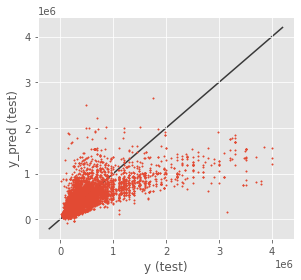

In [16]:
   with plt.style.context('ggplot'): 
    plt.figure(figsize = (8,4))

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    



*   *Creamos los modelos K vecinos más cercanos y árbol de decisión con hiperparametros elegidos.*


**Vecinos Más Cercanos.**

Creamos y entrenamos nuestro modelo K vecinos.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 10
clf_knn = KNeighborsClassifier(n_neighbors =n_neighbors )

clf_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

Predecimos etiquetas para train y test.

In [18]:
y_train_pred = clf_knn.predict(x_train)
y_test_pred = clf_knn.predict(x_test)

Sacamos el RMSE.

In [19]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 188548.25336321842
Raíz del error cuadrático medio en Test: 212978.7930969311


Graficamos los valores reales Vs los valores predichos. 

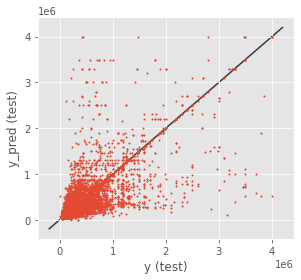

In [20]:
   with plt.style.context('ggplot'):  
    plt.figure(figsize = (8,4))
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Árbol de decisión.**

Creamos y entrenamos nuestro modelo árbol de decisión.

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

Predecimos etiquetas para train y test.

In [22]:
y_train_pred = tree_regressor.predict(x_train)
y_test_pred = tree_regressor.predict(x_test)

Sacamos el RMSE.

In [23]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 178947.60749154066
Raíz del error cuadrático medio en Test: 183592.64362839411


Graficamos los valores reales Vs los valores predichos.

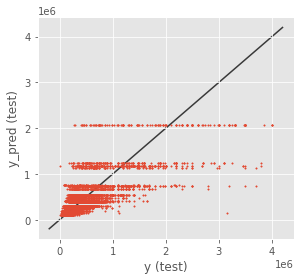

In [24]:
   with plt.style.context('ggplot'):  
    plt.figure(figsize = (8,4))

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()



*   *Optimizamos nuestros modelos.*



**Optimización**

K Vecinos.

In [25]:
lista_rmse_train = []
lista_rmse_test = []
KNN=range(1,30,1)

for n in KNN:
    clf_knn = KNeighborsClassifier(n_neighbors=n)
    clf_knn.fit(x_train,y_train)
    y_train_pred = clf_knn.predict(x_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = clf_knn.predict(x_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)


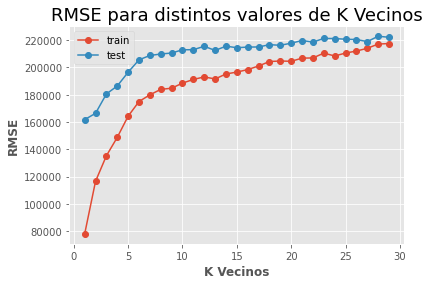

In [26]:
with plt.style.context('ggplot'): 
  plt.plot(KNN, lista_rmse_train,'o-',label='train' )
  plt.plot(KNN, lista_rmse_test,'o-',label='test')
  plt.grid(True)
  plt.legend()
  plt.xlabel("K Vecinos", fontweight = "black", fontsize = 12)
  plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
  plt.title("RMSE para distintos valores de K Vecinos", fontsize = 18)

Teniendo en cuenta la optimización realizada optaria por utilizar un k=2 puesto que es el ultimo valor antes de que empiece a aumentar de forma considerable los errores para train y test.

In [30]:
n_neighbors = 2
clf_knn = KNeighborsClassifier(n_neighbors =n_neighbors )

clf_knn.fit(x_train,y_train)

y_train_pred = clf_knn.predict(x_train)
y_test_pred = clf_knn.predict(x_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 116529.27623687066
Raíz del error cuadrático medio en Test: 166398.10123922958


Árbol de decisión.

In [32]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(x_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

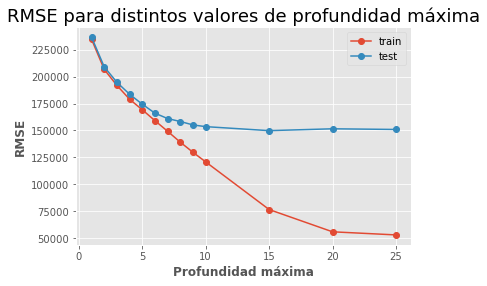

In [33]:
with plt.style.context('ggplot'): 
  plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
  plt.plot(max_depths, lista_rmse_test,'o-',label='test')
  plt.grid(True)
  plt.legend()
  plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
  plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
  plt.title("RMSE para distintos valores de profundidad máxima", fontsize = 18)

Teniendo en cuenta la optimización realizada optaría por utilizar una profundidad de 9 pues es donde se tiene el valor de error más bajo para test antes de que los valores para RMSE de train empieza a bajar en grandes proporciones. 

In [34]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=9, random_state=42)

tree_regressor.fit(x_train, y_train)

y_train_pred = tree_regressor.predict(x_train)
y_test_pred = tree_regressor.predict(x_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')


Raíz del error cuadrático medio en Train: 129685.36078409558
Raíz del error cuadrático medio en Test: 154597.72517828608


In [35]:
resultados_modelacion = {"Modelos":["Regresión","knn","Árbol","Knn Optimizado","Árbol optimizado"],
                         "Hiperparametros":["NA","k 10","Profundidad 4","k 2","Profundidad 9"],
                         "Overfitig":["Si","Si","Si","Si","Si"],
                         "Rmse Train":[199173.83253528475,188548.25336321842,178947.60749154066,116529.27623687066,129685.36078409558],
                        "Rmse Test":[202449.36540361578,212978.7930969311,183592.64362839411,166398.10123922958,154597.72517828608]}
resultados = pd.DataFrame(resultados_modelacion)
resultados

,Modelos,Hiperparametros,Overfitig,Rmse Train,Rmse Test
0,Regresión,NA,Si,199173.832535,202449.365404
1,knn,k 10,Si,188548.253363,212978.793097
2,Árbol,Profundidad 4,Si,178947.607492,183592.643628
3,Knn Optimizado,k 2,Si,116529.276237,166398.101239
4,Árbol optimizado,Profundidad 9,Si,129685.360784,154597.725178


En este caso elegiría el árbol con profundidad de 9, es de los valores de RMSE más bajo y adicional a esto no presenta un overfitting tan marcado.

Partiendo de la base de datos general se tomaron en cuenta las categorías en las que están agrupados por mucho la mayoría de los datos e influyen en buena medida para determinar el valor del precio, por lo que podríamos decir que este análisis es representativo de este grupo de datos, aunque sería enriquecido teniendo en cuenta las otras regiones para determinar la variación en precio entre ellas.

---
# <br />
# SPRINT 2
# <br />
---

Partiendo de un análisis inicial, se requiere mejorar el rendimiento del modelo y conocer un poco más sobre el problema.

In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [80]:
df=pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


a. Se necesita un preprocesamiento para poder cargar datos de mayor calidad a los  modelos, se hace necesario en este caso:

DETECCIÓN Y ELIMINACIÓN DE OUTLIERS

In [81]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


Gracias al decribe se pueden observar valores máximos muy alejados del tercer cuantil lo que nos indica valores atípicos, estos valores atípicos los vamos a abordar mediante el método rango intercuartil.

Rango intercuatil.

In [82]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lat                     0.053067
lon                     0.096426
rooms                   2.000000
bedrooms                2.000000
bathrooms               1.000000
surface_total          88.000000
surface_covered        61.000000
price              154000.000000
dtype: float64


In [83]:
df= df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-83-e8c4e3dce4d3>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df= df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-83-e8c4e3dce4d3>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df= df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(99557, 19)

Verificamos la eliminación de outliers diagrama de cajas 

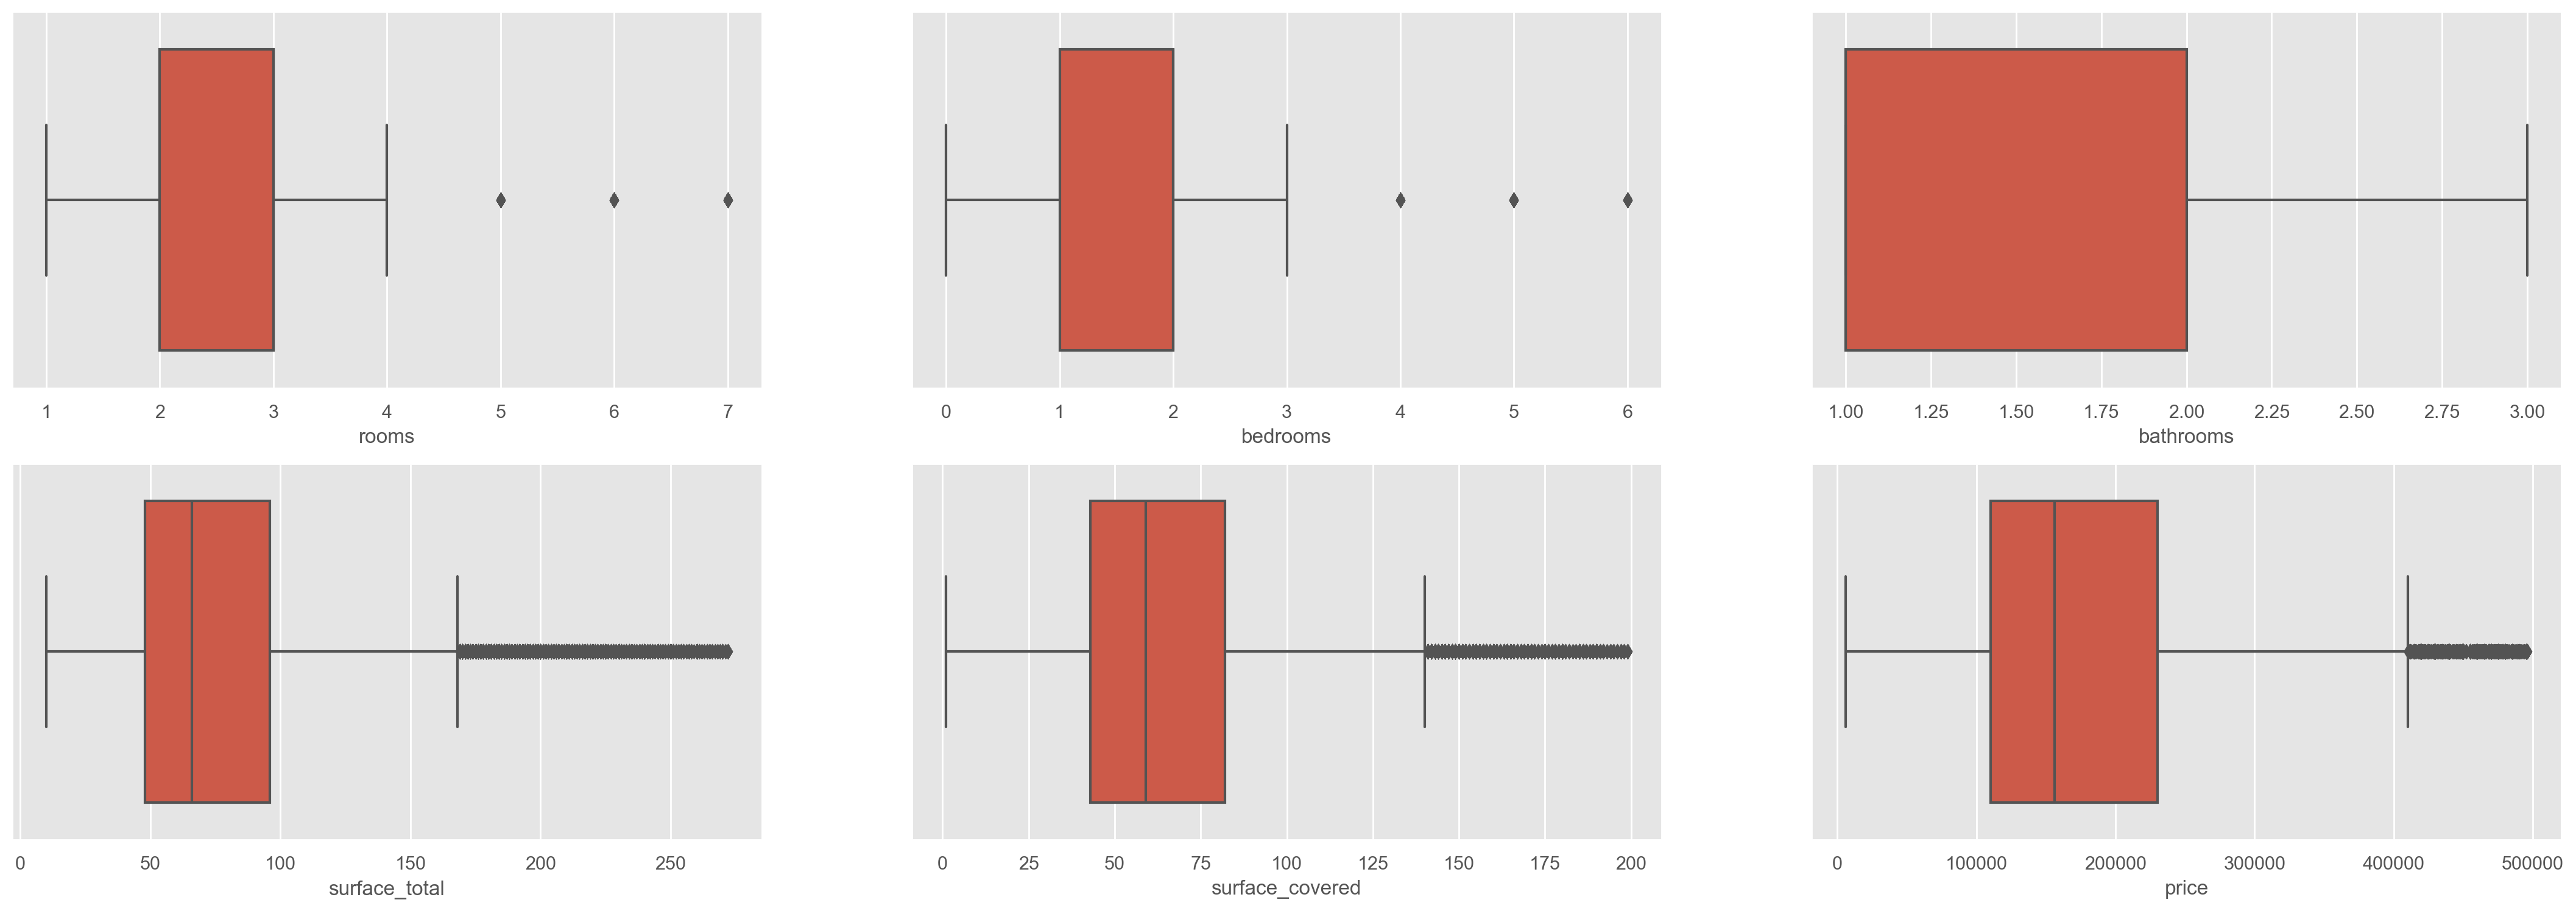

In [84]:
with plt.style.context('ggplot'):
  fig=plt.figure(figsize=(27*1,9), dpi=200)
  fig.tight_layout()

  plt.subplot(2,3,1)
  sns.boxplot(x=df['rooms'])

  plt.subplot(2,3,2)
  sns.boxplot(x=df['bedrooms'])

  plt.subplot(2,3,3)
  sns.boxplot(x=df['bathrooms'])

  plt.subplot(2,3,4)
  sns.boxplot(x=df['surface_total'])

  plt.subplot(2,3,5)
  sns.boxplot(x=df['surface_covered'])

  plt.subplot(2,3,6)
  sns.boxplot(x=df['price'])

ENCODING

En el Dataset tenemos varias columnas que hacen referencia a la ubicación de la propiedad, en este caso dejaremos l2 que se refiere a las regiones, también trabajaremos las siguientes columnas; rooms, bedrooms, bathrooms, surface_total, surface_covered, Price y property_type.

In [85]:
df2=df[['l2','rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type']]
df2

,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,Capital Federal,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...,...
146601,Bs.As. G.B.A. Zona Sur,3.0,2.0,2.0,107.0,88.0,340000.0,Departamento
146602,Bs.As. G.B.A. Zona Sur,3.0,2.0,2.0,107.0,88.0,320000.0,Departamento
146652,Bs.As. G.B.A. Zona Norte,2.0,1.0,1.0,38.0,38.0,70000.0,Departamento
146653,Bs.As. G.B.A. Zona Oeste,2.0,1.0,1.0,45.0,45.0,110000.0,PH


Graficamos para determinar cuáles son los tipos de propiedad a tomar en cuenta según la cantidad en cada una. 

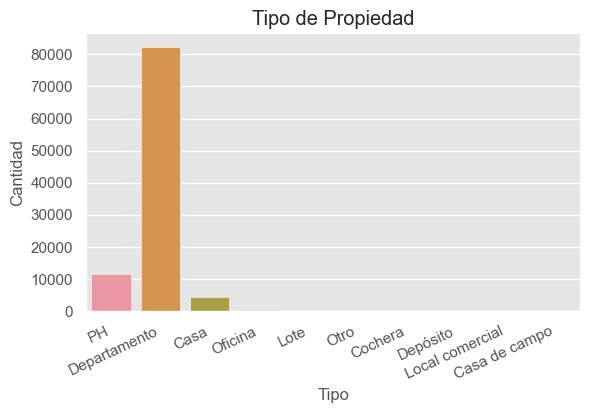

In [86]:
with plt.style.context('ggplot'):
  fig=plt.figure(dpi=100)
  g=sns.countplot(data = df2, x = 'property_type')
  g.set_xticklabels(g.get_xticklabels(), rotation=25, ha="right")
  plt.tight_layout()
  plt.xlabel('Tipo')
  plt.ylabel('Cantidad')
  plt.title('Tipo de Propiedad')

  plt.show()

Los tipos de propiedad con mayores registros son Departamento, PH y casa, con los cuales trabajaremos.

In [87]:
df3 = df2[df2.property_type.isin(["Departamento", "Casa", "PH"])]

df3.reset_index(drop=True, inplace=True)

Para tener las variables a usar de forma numérica, implementaremos One Hot Encoding puesto que las variables a encodear; regiones (l2) y tipo de propiedad, pueden tomar más de 2 valores diferentes.

In [88]:
data=df3.replace({"Bs.As. G.B.A. Zona Sur": "Zona Sur", "Bs.As. G.B.A. Zona Norte": "Zona Norte", "Bs.As. G.B.A. Zona Oeste": "Zona Oeste"})

In [89]:
data_encoding=pd.get_dummies(data=data, drop_first=True, columns=["l2","property_type"])
data_encoding

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l2_Zona Norte,l2_Zona Oeste,l2_Zona Sur,property_type_Departamento,property_type_PH
0,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,0,0,1
1,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,0,0,1
2,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,0,0,1
3,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,0,0,1
4,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
98412,3.0,2.0,2.0,107.0,88.0,340000.0,0,0,1,1,0
98413,3.0,2.0,2.0,107.0,88.0,320000.0,0,0,1,1,0
98414,2.0,1.0,1.0,38.0,38.0,70000.0,1,0,0,1,0
98415,2.0,1.0,1.0,45.0,45.0,110000.0,0,1,0,0,1


ESCALADO

Revisamos la distribución de nuestro datos antes del escalado. 

In [90]:
x=data_encoding[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered','l2_Zona Norte', 'l2_Zona Oeste', 'l2_Zona Sur', 'property_type_Departamento','property_type_PH']]
y=data_encoding[['price']]

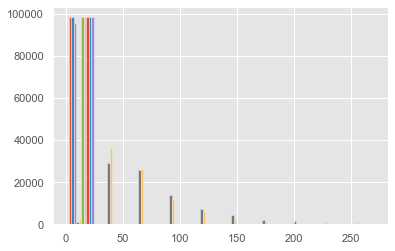

In [91]:
with plt.style.context('ggplot'):
    plt.hist(x)

Separamos nuestros datos en train y test e implementamos StandarScaler para estandarizar

In [92]:
scaler = StandardScaler()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

Verificamos el resultado de nuestro escalamiento

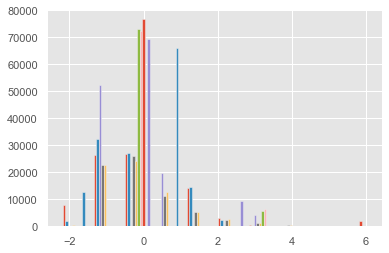

In [94]:
with plt.style.context('ggplot'):
    plt.hist(X_train_sc)

IMPUTACIÓN

Revisamos la cantidad de datos faltantes en cada columna.

In [95]:
valores_nulos=data_encoding.isna().sum()
valores_nulos

rooms                             0
bedrooms                          0
bathrooms                      2873
surface_total                 11724
surface_covered               12053
price                             0
l2_Zona Norte                     0
l2_Zona Oeste                     0
l2_Zona Sur                       0
property_type_Departamento        0
property_type_PH                  0
dtype: int64

Utilizamos imputación iterativa para imputar todos los datos faltantes de nuestro dataset.

In [96]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

In [97]:
imputer=IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=10, imputation_order="ascending", random_state=21)

In [98]:
X_train_imp = imputer.fit_transform(X_train_sc)
X_test_imp = imputer.transform(X_test_sc)

C:\Users\Vane\miniconda3\envs\datascience\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [99]:
bathrooms_t = imputer.fit_transform(data_encoding[["bathrooms"]])
surface_total_t = imputer.fit_transform(data_encoding[["surface_total"]])
surface_covered_t= imputer.fit_transform(data_encoding[["surface_covered"]])

In [100]:
imputados = pd.concat([pd.DataFrame(bathrooms_t, columns=["bath_imp"]), pd.DataFrame(surface_total_t, columns=["surface_total_imp"]), pd.DataFrame(surface_covered_t, columns=["surface_covered_imp"])], axis = 1)

imputados

,bath_imp,surface_total_imp,surface_covered_imp
0,2.0,70.0,58.0
1,1.0,45.0,45.0
2,1.0,85.0,50.0
3,1.0,56.0,56.0
4,1.0,70.0,70.0
...,...,...,...
98412,2.0,107.0,88.0
98413,2.0,107.0,88.0
98414,1.0,38.0,38.0
98415,1.0,45.0,45.0


Verificamos que no existen datos faltantes en ninguna columna.

In [101]:
imputados.isna().sum()

bath_imp               0
surface_total_imp      0
surface_covered_imp    0
dtype: int64

In [102]:
dataframe = pd.concat([data_encoding , imputados], axis = 1)

In [103]:
dataframe.isna().sum()

rooms                             0
bedrooms                          0
bathrooms                      2873
surface_total                 11724
surface_covered               12053
price                             0
l2_Zona Norte                     0
l2_Zona Oeste                     0
l2_Zona Sur                       0
property_type_Departamento        0
property_type_PH                  0
bath_imp                          0
surface_total_imp                 0
surface_covered_imp               0
dtype: int64

ARBOL DE DECISIÓN

Separamos y entrenamos de nuevo los datos de nuestro dataset transformado para realizar la comparacion.

In [78]:
from sklearn.tree import DecisionTreeRegressor

x=dataframe[['rooms', 'bedrooms', 'bath_imp', 'surface_total_imp', 'surface_covered_imp','l2_Zona Norte', 'l2_Zona Oeste', 'l2_Zona Sur', 'property_type_Departamento','property_type_PH']]
y=dataframe[['price']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
tree_regressor= DecisionTreeRegressor(max_depth=9, random_state=42)
tree_regressor.fit(X_train, y_train)

NameError: name 'dataframe' is not defined

In [28]:
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 53376.15077779883
Raíz del error cuadrático medio en Test: 53851.539738793486


Cuando se realizó el modelo sencillo se determinó que un modelo optimo es el árbol de decisión con profundidad de 9 y errores de Train RMSE= 129685.360784 y Test RMSE=154597.725178, luego de la transformación de datos y evaluar el mismo modelo obtuvimos Train RMSE= 53230.16958156087 y Test RMSE= 53753.57763968659 lo que evidencia una gran disminución de este luego del pre-procesamiento de los datos.

IMPORTANCIA DE VARIABLES

Con respecto a la importancia de variables tenemos:

In [30]:
headers    = x.columns.values.tolist()

In [31]:
var_imp = pd.DataFrame({'feature':headers, 'v_importance':tree_regressor .feature_importances_.tolist()})
print (var_imp.sort_values(by = 'v_importance', ascending=False))

                      feature  v_importance
2                    bath_imp      0.522605
4         surface_covered_imp      0.235366
3           surface_total_imp      0.099404
6               l2_Zona Oeste      0.044705
8  property_type_Departamento      0.038796
1                    bedrooms      0.019138
7                 l2_Zona Sur      0.018759
0                       rooms      0.010380
9            property_type_PH      0.005786
5               l2_Zona Norte      0.005062


Las variables relevantes en este análisis son baños y superficie cubierta, mientras que la importancia de tipo de propiedad PH y la Zona norte es mínima.

REGRESION LINEAL POLINOMICA

Como primer modelo avanzado implementamos la regresión lineal con atributos polinomicos.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate

Inicialmente se reduce el grado del polinomio mediante Polinomial Features.

In [51]:
poly = PolynomialFeatures(3, include_bias=False)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train_pol = poly.fit_transform(X_train)
X_test_pol = poly.fit_transform(X_test)

Realizamos la regresión lineal a partir de los datos obtenidos de la reducción de grado en el polinomio. 

In [53]:
reg = LinearRegression()
reg.fit(X_train_pol, y_train)
y_train_pred_pol = reg.predict(X_train_pol)
y_test_pred_pol = reg.predict(X_test_pol)

In [54]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_pol))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_pol))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 55775.328415181524
Raíz del error cuadrático medio en Test: 56198.944365551615


Al evaluar el modelo obtuvimos Train RMSE= 55705.18545020074 y Test RMSE= 56437.74097931314 

Se grafica la distribución obtenida.

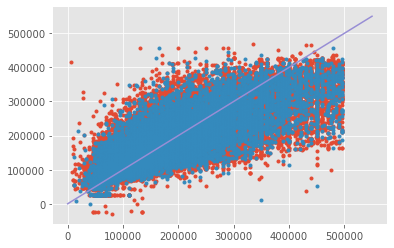

In [56]:
with plt.style.context('ggplot'):
    plt.plot(y_train, y_train_pred_pol, '.')
    plt.plot(y_test, y_test_pred_pol, '.')
    plt.plot((0, 550000),(0,550000))


REGULARIZACIÓN

Para ajustar la cantidad de parámetros que pudieron llegar a crearse en los anteriores pasos se efectúa la regularización mediante Ridge en este caso, minimizando la función de costo. 

In [57]:
from sklearn.linear_model import Ridge

In [58]:
reg_ridge = Ridge(alpha= 0.1)
reg_ridge.fit(X_train_pol,y_train)

C:\Users\Vane\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23778e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

In [59]:
y_train_pred_ridge = reg_ridge.predict(X_train_pol)
y_test_pred_ridge = reg_ridge.predict(X_test_pol)

In [60]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 55775.55374723963
Raíz del error cuadrático medio en Test: 56198.255416684646


Al evaluar el modelo obtuvimos Train RMSE= 55705.412797460296 y Test RMSE= 56437.122951605925, se aumenta el error pero no de forma considerable.

Se grafica la distribución obtenida.

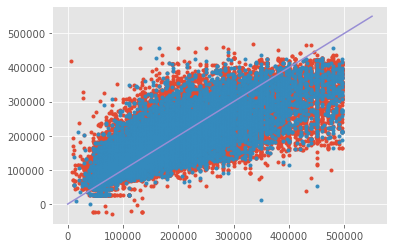

In [63]:
with plt.style.context('ggplot'):
    plt.plot(y_train, y_train_pred_ridge, '.')
    plt.plot(y_test, y_test_pred_ridge, '.')
    plt.plot((0, 550000),(0,550000))

Validación Cruzada

Se realiza validación cruzada para verificar el valor mínimo de error que se puede obtener variando la separación de los datos.

In [65]:
from sklearn.model_selection import cross_validate

In [ ]:
reg_score = cross_validate(reg_ridge, X_train_pol, y_train, cv=5, n_jobs=-1, return_train_score=True, scoring='neg_root_mean_squared_error')
reg_score

A partir de la validación cruzada se obtienen valores mínimos de Train RMSE= 55683.72111913 y Test RMSE= 55956.95565168.

OPTIMIZACIÓN

Se realiza la optimización de los hiperparametros para la regresión mediante el método Random search.

Random Search

In [ ]:
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
model= Ridge()

In [ ]:
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-2, 10)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

In [ ]:
search = RandomizedSearchCV(model, space, n_iter=100, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=5, random_state=1)

In [45]:
result = search.fit(X_train_pol, y_train)

C:\Users\Vane\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.51965e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Así obtenemos:

In [46]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -56014.518045147204
Best Hyperparameters: {'alpha': 0.37000695615570545, 'fit_intercept': True, 'normalize': False, 'solver': 'cholesky'}


RANDOM FOREST

Como segundo modelo avanzado implementamos Random forest.

In [32]:
reg_rf = RandomForestRegressor(n_estimators=10, n_jobs=-1)
reg_rf.fit(X_train, y_train)

<ipython-input-32-e731c7f0e65a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, n_jobs=-1)

In [33]:
y_train_pred_rf = reg_rf.predict(X_train)
y_test_pred_rf = reg_rf.predict(X_test)

In [34]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 36041.79818342493
Raíz del error cuadrático medio en Test: 45702.17672577259


Al evaluar el modelo obtuvimos Train RMSE= 35747.008151143935 y Test RMSE= 46541.76325739732

DISTRIBUCIÓN DE LOS ERRORES

Se determina la distribución de los errores:

In [40]:
y_train_pred_rf=y_train_pred_rf.reshape(78733,1)
y_test_pred_rf=y_test_pred_rf.reshape(19684,1)

C:\Users\Vane\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vane\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


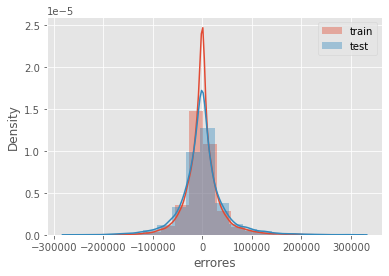

In [42]:
with plt.style.context('ggplot'):
    sns.distplot(y_train - y_train_pred_rf, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred_rf, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

Los histogramas de los errores son simétricos, pero en test la curva es más amplia lo que nos deja ver que puede estar sobre ajustando los datos. 

IMPORTANCIA DE VARIABLES    

Se determina la importancia de las diferentes variables al implementar el modelo y obtenemos:

In [35]:
var_imp = pd.DataFrame({'feature':headers, 'v_importance':reg_rf .feature_importances_.tolist()})
print (var_imp.sort_values(by = 'v_importance', ascending=False))

                      feature  v_importance
2                    bath_imp      0.405959
4         surface_covered_imp      0.265522
3           surface_total_imp      0.164344
6               l2_Zona Oeste      0.034188
8  property_type_Departamento      0.032093
1                    bedrooms      0.031312
0                       rooms      0.027062
7                 l2_Zona Sur      0.018016
5               l2_Zona Norte      0.014366
9            property_type_PH      0.007138


Las variables de mayor importancia para este modelo son cantidad de baños y las superficies cubierta y total, mientras que la importancia del resto de variables relacionadas a tipo de propiedad y zona es mínima. 
Para un árbol con profundidad 9 y random forest el orden de las variables según su importancia es similar, las de mayor importancia son las mismas, cambia el porcentaje y en las de menos importancia el orden.

Validación cruzada.

In [53]:
rf_score = cross_validate(reg_rf, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1, scoring='neg_root_mean_squared_error')
rf_score

{'fit_time': array([2.63876843, 2.88593245, 2.75684667, 2.67078876, 0.85256457]),
 'score_time': array([0.09606528, 0.22014785, 0.07805181, 0.09306479, 0.03202128]),
 'test_score': array([-48332.65063318, -47145.56692317, -47071.96088651, -47019.69909736,
        -47324.91904078]),
 'train_score': array([-35317.54467625, -35700.42786771, -35620.78198626, -35653.67244011,
        -35418.12015592])}

A partir de la validación cruzada se obtienen valores mínimos de Train RMSE= 35653.67244011 y Test RMSE= 47019.69909736.

REDUCCIÓN DE DIMENSIONALIDAD

In [104]:
from sklearn.decomposition import PCA

In [105]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_imp) 

CLUSTERING

In [106]:
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

C:\Users\Vane\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vane\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


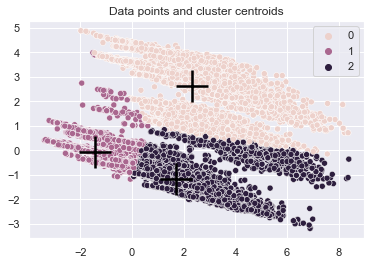

In [107]:
km = KMeans(n_clusters=3)
km = km.fit(X_train_pca)

etiquetas_ = km.labels_
centros_ = km.cluster_centers_

sns.scatterplot(X_train_pca[:, 0], X_train_pca[:, -1], hue = etiquetas_)
sns.scatterplot(centros_[:, 0], centros_[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

Se observan tres clusters que en este caso pueden hacer referencia a los tipos de propiedad que tuvimos en cuenta para el análisis: departamento, casa y PH

CONCLUSIONES

-La implementación del pre procesamiento aumenta en forma considerable el rendimiento del modelo, se tienen que tener en cuenta las necesidades de cada dataset y realizar el tratamiento pertinente.

-No necesariamente porque un modelo sea más complejo va a tener mejores resultados, en este caso el árbol de decisión dio menor error que la regresión.

-La selección de los hiperparámetros a optimizar es muy importante en este caso no se eligieron los mejores puesto que el error luego de esta optimización es mayor que en el modelo inicial.

-El modelo con mayor rendimiento fue Random Forest con errores Train RMSE= 35747.008151143935 y Test RMSE= 46541.76325739732